Fetch the example code

In [ ]:
!git clone https://github.com/papkov/tinyimagenet.git

Download the data

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip -O tinyimagenet/data/tiny-imagenet-200.zip
!unzip tinyimagenet/data/tiny-imagenet-200.zip -d tinyimagenet/data

Install missing dependencies

In [ ]:
!pip install hydra-core omegaconf

In [ ]:
!pip install -U albumentations

Change pwd to `tinyimagenet`

In [6]:
%cd tinyimagenet

/content/tinyimagenet


Add source code to path

In [7]:
import sys
import os

sys.path.insert(0, ".")

Now you can import modules from source code

In [8]:
from modules import dataset
# you can call reload(module) if you update the source code e.g. with `git pull`
from importlib import reload

In [9]:
import albumentations as albu
import matplotlib.pyplot as plt
from omegaconf import OmegaConf, DictConfig
from pathlib import Path

In [16]:
reload(dataset)
cfg = OmegaConf.load('config/data/tinyimagenet.yaml')

data_root = Path(cfg.root)
train_path = data_root / cfg.train
val_path = data_root / cfg.val

train_dataset = dataset.TinyImagenetDataset(train_path, cfg, None)
val_dataset = dataset.TinyImagenetDataset(val_path, cfg, None)

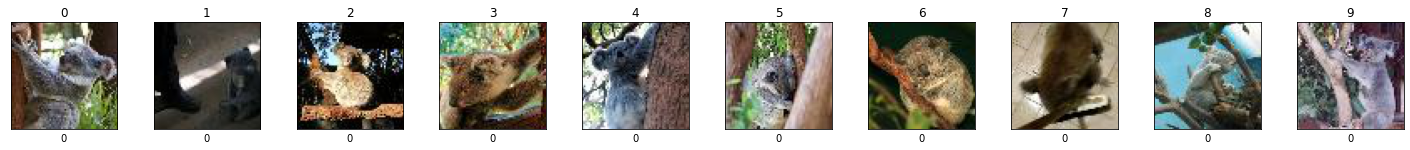

In [17]:
def clean_show(ax):
    "Show plt figure without axes in tight layout"
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()


def show_examples(dataset, n_examples=10, s=2):
    fig, axes = plt.subplots(ncols=n_examples, figsize=(s*n_examples, s))
    for i, (ax, item) in enumerate(zip(axes, dataset)):
        ax.imshow(item.image)
        ax.set_title(item.id)
        ax.set_xlabel(item.label)
    clean_show(axes)

show_examples(train_dataset)

You can also run the training script

In [13]:
!nvidia-smi

Wed Nov 17 20:03:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python train.py train.epochs=5 train.batch_size=512

[2021-11-17 20:13:12,689][__main__][INFO] - Looking for dataset in /content/tinyimagenet/data/tiny-imagenet-200
[2021-11-17 20:13:12,689][__main__][INFO] - Write checkpoints to /content/tinyimagenet/results/models.resnet18/2021-11-17_20-13-12/checkpoints/model.pth
[2021-11-17 20:13:12,696][__main__][INFO] - Loaded transforms from /content/tinyimagenet/config/augmentation/default.yaml
[2021-11-17 20:13:13,382][__main__][INFO] - Created training dataset (100000) and loader (196): batch size 512, num workers 4
[2021-11-17 20:13:13,576][__main__][INFO] - Created validation dataset (10000) and loader (20): batch size 512, num workers 4
[2021-11-17 20:13:13,601][__main__][INFO] - Using device=cuda
[2021-11-17 20:13:13,816][__main__][INFO] - Created model models.resnet18(pretrained=False) with 200 outputs
[2021-11-17 20:13:16,297][__main__][INFO] - Created optimizer SGD(lr=0.1, momentum=0.9, weight_decay=1e-05)
[2021-11-17 20:13:16,297][__main__][INFO] - Created scheduler CosineAnnealingLR(T_